In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
tk = th.Thicket.from_caliperreader(glob("24-cali/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 39/39 [00:01<00:00, 27.19it/s]


In [3]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

3.793 main
├─ 1.291 main
│  ├─ 1.232 comm_large
│  │  ├─ 0.041 mpi_recv
│  │  └─ 1.341 mpi_send
│  ├─ 0.059 comp_large
│  ├─ 0.048 correctness_check
│  └─ 0.046 data_init_runtime
└─ 2.496 mpi_init

Legend (Metric: Avg time/rank Min: 0.04 Max: 3.79 indices: {'profile': 40368556})
█ 3.42 - 3.79
█ 2.67 - 3.42
█ 1.92 - 2.67
█ 1.17 - 1.92
█ 0.42 - 1.17
█ 0.04 - 0.42

name User code    ◀  Only in left graph    ▶  Only in right graph



In [3]:
processes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [4]:
def plot_mpl(df, title, xlabel, col):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    
    labels = df['input_type'].unique()
    for label in labels:
        subset = df[df['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        ax.plot(subset['num_procs'], subset[col], marker='o', label=label+' '+col[0:3])

        
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(col)
    ax.legend()
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()
    return fig, ax

In [7]:
tk.dataframe.head()

nid   spot.channel  \
node                                 profile                         
{'name': 'main', 'type': 'function'} 40368556   1.0  regionprofile   
                                     271538845  1.0  regionprofile   
                                     500002216  1.0  regionprofile   
                                     562297092  1.0  regionprofile   
                                     633508633  1.0  regionprofile   

                                                Min time/rank  Max time/rank  \
node                                 profile                                   
{'name': 'main', 'type': 'function'} 40368556        2.503329      31.541047   
                                     271538845       2.930791      60.429036   
                                     500002216       1.292275       1.844217   
                                     562297092       1.821224       3.681490   
                                     633508633       2.530291      16.665159   

                                                Avg time/rank   Total time  \
node                                 profile                                 
{'name': 'main', 'type': 'function'} 40368556        3.792958  1941.994532   
                                     271538845       5.591808  5726.011171   
                                     500002216       1.388914    11.111310   
                                     562297092       1.904312    60.937995   
                                     633508633       2.739183   701.230864   

                                                Min time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 40368556              0.005276   
                                     271538845             0.005280   
                                     500002216             0.005536   
                                     562297092             0.005389   
                                     633508633             0.005288   

                                                Max time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 40368556              0.006473   
                                     271538845             0.007566   
                                     500002216             0.006078   
                                     562297092             0.007734   
                                     633508633             0.029043   

                                                Avg time/rank (exc)  \
node                                 profile                          
{'name': 'main', 'type': 'function'} 40368556              0.005560   
                                     271538845             0.005584   
                                     500002216             0.005836   
                                     562297092             0.006457   
                                     633508633             0.007910   

                                                Total time (exc)  \
node                                 profile                       
{'name': 'main', 'type': 'function'} 40368556           2.846680   
                                     271538845          5.718026   
                                     500002216          0.046687   
                                     562297092          0.206625   
                                     633508633          2.025048   

                                                Calls/rank (min)  \
node                                 profile                       
{'name': 'main', 'type': 'function'} 40368556                NaN   
                                     271538845               NaN   
                                     500002216               NaN   
                                     562297092               NaN   
                                     633508633               NaN   

 

In [8]:
 # Access the Adiak metadata associated with a specific node in the call tree
print(tk.metadata.columns)
array_types = tk.metadata["input_type"]
num_procs = tk.metadata['num_procs'] + 1

Index(['cali.caliper.version', 'mpi.world.size', 'spot.metrics',
       'spot.timeseries.metrics', 'spot.format.version', 'spot.options',
       'spot.channels', 'cali.channel', 'spot:node.order', 'spot:output',
       'spot:region.count', 'spot:time.exclusive', 'launchdate', 'libraries',
       'cmdline', 'cluster', 'algorithm', 'programming_model', 'data_type',
       'size_of_data_type', 'input_size', 'input_type', 'num_procs',
       'scalability', 'group_num', 'implementation_source'],
      dtype='object')


In [5]:
tks = {}

for i in range(16, 30, 2):
    thicket_data = th.Thicket.from_caliperreader(glob(f"{i}-cali/*.cali"))
    
    # df = thicket_data.dataframe

    tks[f'tk{i}'] = thicket_data

(2/2) Creating Thicket: 100%|██████████| 39/39 [00:01<00:00, 37.77it/s]


In [40]:
print(tks['tk26'].tree(metric_column="Max time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

9.576 main
├─ 7.926 main
│  ├─ 0.522 comm_large
│  │  ├─ 0.464 mpi_recv
│  │  └─ 0.058 mpi_send
│  ├─ 7.031 comp_large
│  ├─ 0.190 correctness_check
│  └─ 0.182 data_init_runtime
└─ 1.646 mpi_init

Legend (Metric: Max time/rank Min: 0.06 Max: 9.58 indices: {'profile': 5416277})
█ 8.62 - 9.58
█ 6.72 - 8.62
█ 4.82 - 6.72
█ 2.91 - 4.82
█ 1.01 - 2.91
█ 0.06 - 1.01

name User code    ◀  Only in left graph    ▶  Only in right graph



In [10]:
def plot(df, sz):
    main_time = df.dataframe.loc[df.get_node("main")[0], ["Max time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs'] + 1
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    # main_time.sort_values(by='num_procs').tail(20)
    plot_mpl(
        df=main_time,
        title=f"Total Main Time for 2^{sz} array size",
        xlabel="num_procs",
        col="Max time/rank"
    )
    
    comm_time = df.dataframe.loc[df.get_node("comm_large"), ["Avg time/rank"]]
    comm_time = pd.merge(comm_time, array_types, on="profile").merge(num_procs, on="profile")

    plot_mpl(
        df=comm_time,
        title=f"Avg Comm Time for 2^{sz} array size",
        xlabel="num_procs",
        col="Avg time/rank"
    )

    comp_time = df.dataframe.loc[df.get_node("comp_large"), ["Avg time/rank"]]
    comp_time = pd.merge(comp_time, array_types, on="profile").merge(num_procs, on="profile")

    plot_mpl(
        df=comp_time,
        title=f"Avg Comp Time for 2^{sz} array size",
        xlabel="num_procs",
        col="Avg time/rank"
    )


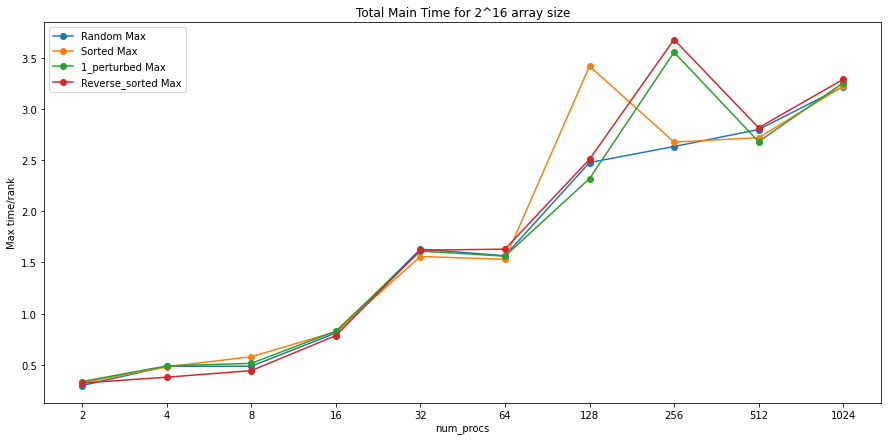

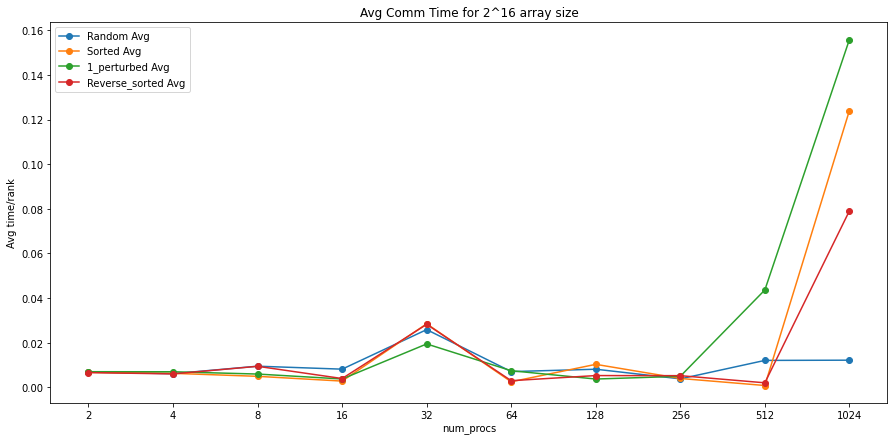

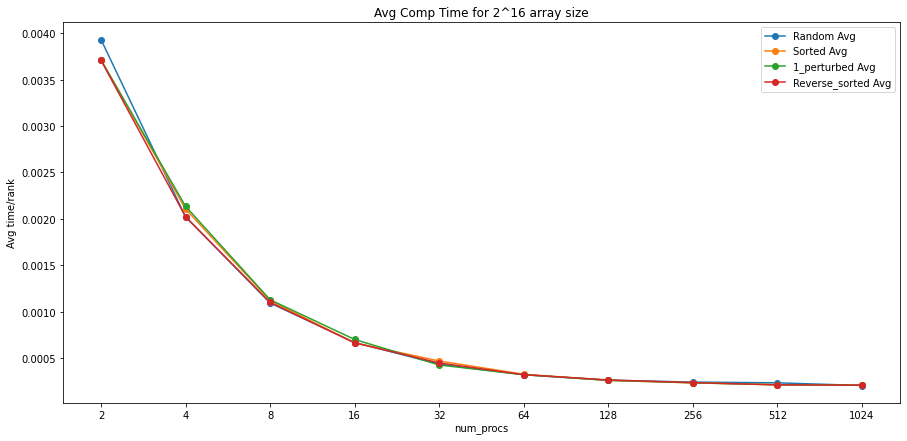

In [80]:
# call for all dataframes for each input size
plot(tks['tk16'], 16)

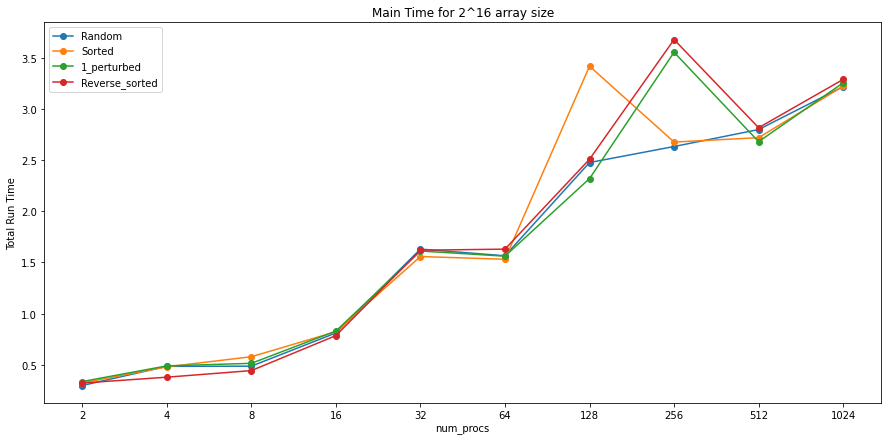

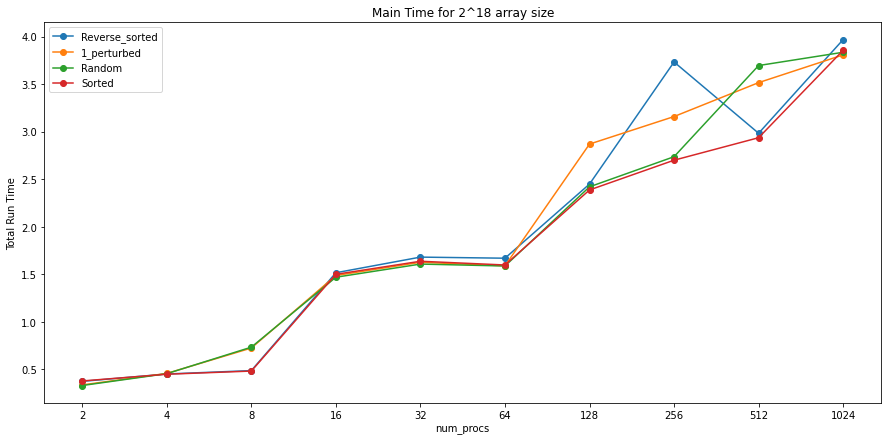

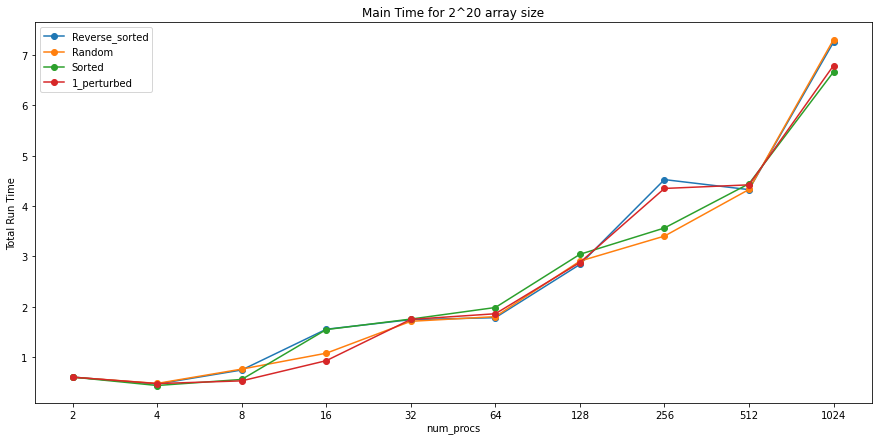

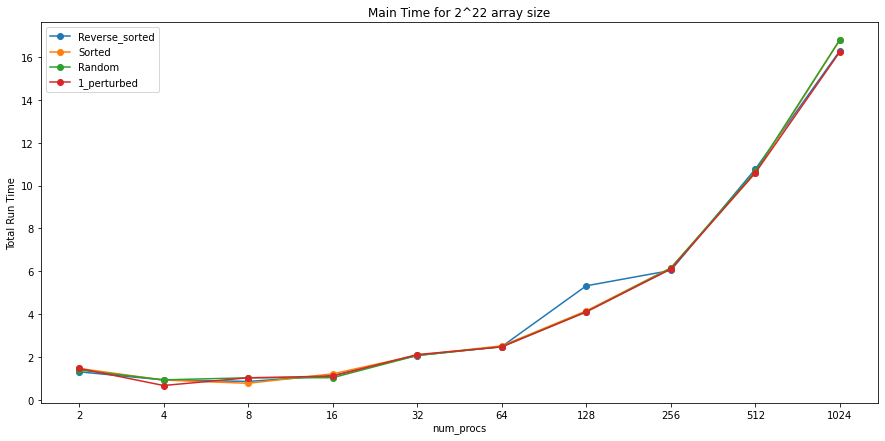

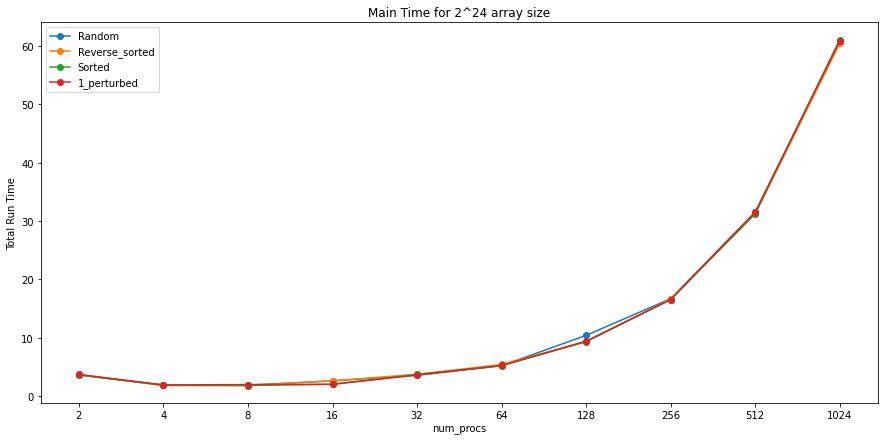

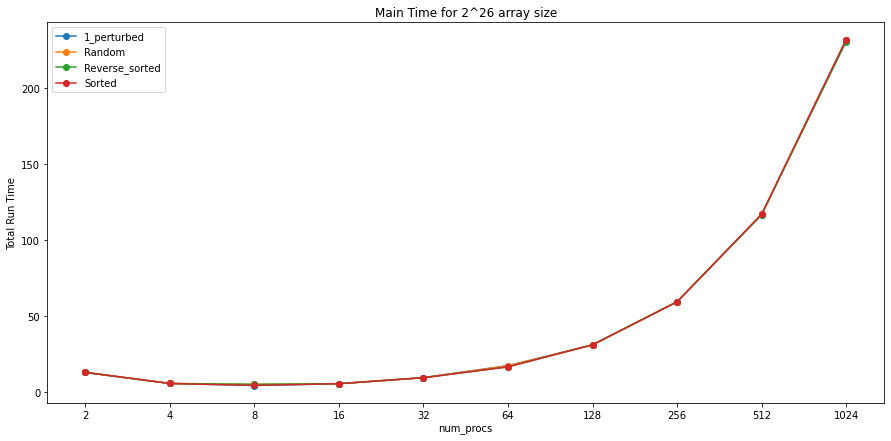

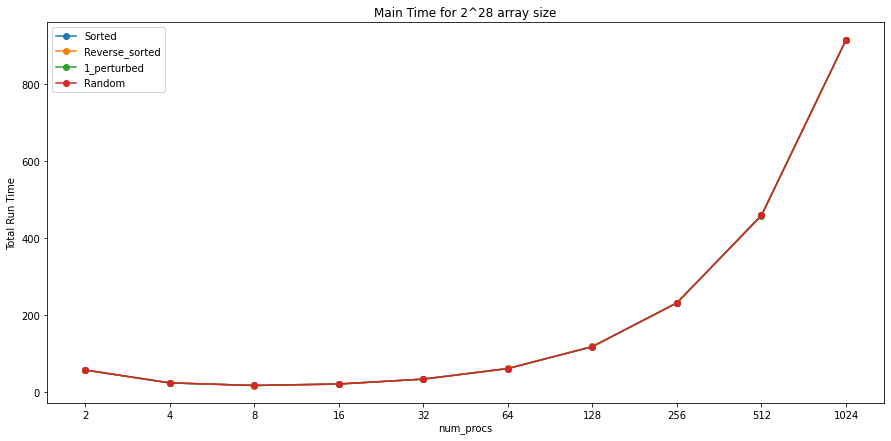

In [88]:
# all strong scaling main graphs
input_types = ['Random', 'Sorted', '1_perturbed', 'Reverse_sorted']
tk_names = ['tk16', 'tk18', 'tk20', 'tk22', 'tk24', 'tk26', 'tk28']
size_labels = ['2^16', '2^18', '2^20', '2^22', '2^24', '2^26', '2^28']

for i in range(7):
    df = tks[tk_names[i]]
    main_time = df.dataframe.loc[df.get_node("main")[0], ["Max time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs'] + 1
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    
    labels = main_time['input_type'].unique()
    for label in labels:
        subset = main_time[main_time['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        ax.plot(subset['num_procs'], subset["Max time/rank"], marker='o', label=label)

        
    ax.set_title(f'Main Time for {size_labels[i]} array size')
    ax.set_xlabel('num_procs')
    ax.set_ylabel("Total Run Time")
    ax.legend()
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()


In [7]:
tk2 = th.Thicket.from_caliperreader(glob("calis/*.cali"))
tk3 = th.Thicket.from_caliperreader(glob("cali2/*.cali"))
tk4 = th.Thicket.from_caliperreader(glob("caliFiles3/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 279/279 [00:07<00:00, 39.45it/s]


In [41]:
main_time2 = tk2.dataframe.loc[tk2.get_node("main"), ["Max time/rank"]]
array_types2 = tk2.metadata["input_type"]
num_procs2 = tk2.metadata['num_procs']
array_size2 = tk2.metadata['input_size']
main_time2 = pd.merge(main_time2, array_types2, on="profile").merge(num_procs2, on="profile").merge(array_size2, on="profile")

main_time3 = tk3.dataframe.loc[tk3.get_node("main"), ["Max time/rank"]]
array_types3 = tk3.metadata["input_type"]
num_procs3 = tk3.metadata['num_procs']
array_size3 = tk3.metadata['input_size']
main_time3 = pd.merge(main_time3, array_types3, on="profile").merge(num_procs3, on="profile").merge(array_size3, on="profile")
print(main_time3.head())


main_time4 = tk4.dataframe.loc[tk4.get_node("main"), ["Max time/rank"]]
array_types4 = tk4.metadata["input_type"]
num_procs4 = tk4.metadata['num_procs']
array_size4 = tk4.metadata['input_size']
main_time4 = pd.merge(main_time4, array_types4, on="profile").merge(num_procs4, on="profile").merge(array_size4, on="profile")
main_time4.head()

           Max time/rank      input_type  num_procs  input_size
profile                                                        
68514760        4.119413          Random        256    16777216
73847141        2.935900          Random        512     4194304
104046532       2.797108  Reverse_sorted        512     1048576
108052460       1.971704  Reverse_sorted          8    16777216
116957526       2.178892          Sorted         64       65536


,Max time/rank,input_type,num_procs,input_size
profile,,,,
1043000,2.664661,1_perc_perturbed,32,4194304
28915897,19.619251,ReverseSorted,2,16777216
38686270,1.654348,Sorted,32,262144
41543813,8.553327,ReverseSorted,128,67108864
77646276,2.899160,1_perc_perturbed,16,4194304


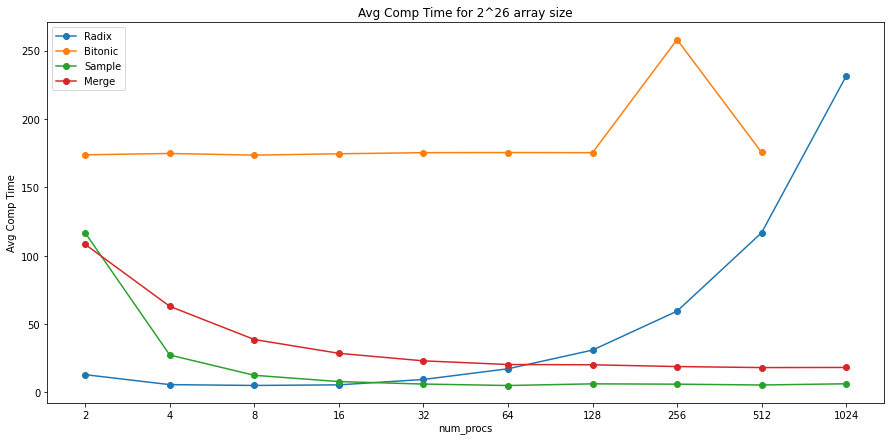

In [44]:
# all strong scaling main graphs
input_types = ['Random']
tk_names = ['tk26']
size_labels = ['2^26']

for i in range(1):
    df = tks[tk_names[i]]
    main_time = df.dataframe.loc[df.get_node("main")[0], ["Max time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs'] + 1
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    
    subset = main_time[main_time['input_type'] == 'Random']  
    subset = subset.sort_values(by='num_procs')
    ax.plot(subset['num_procs'], subset["Max time/rank"], marker='o', label='Radix')
    
    subset = main_time2[main_time2['input_type'] == 'Random']  
    subset = subset[subset['input_size'] == 67108864]
    subset = subset.sort_values(by='num_procs')
    ax.plot(subset['num_procs'], subset["Max time/rank"], marker='o', label='Bitonic')
    
    subset = main_time3[main_time3['input_type'] == 'Random']  
    subset = subset[subset['input_size'] == 67108864]
    subset = subset.sort_values(by='num_procs')
    ax.plot(subset['num_procs'], subset["Max time/rank"], marker='o', label='Sample')
    
    subset = main_time4[main_time4['input_type'] == 'Random']  
    subset = subset[subset['input_size'] == 67108864]
    subset = subset.sort_values(by='num_procs')
    ax.plot(subset['num_procs'], subset["Max time/rank"], marker='o', label='Merge')

        
    ax.set_title(f'Avg Comp Time for {size_labels[i]} array size')
    ax.set_xlabel('num_procs')
    ax.set_ylabel("Avg Comp Time")
    ax.legend()
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()

{'Random': [0.036557, 0.046832, 0.098632, 0.207507, 0.457085, 1.038458, 2.55778], 'Reverse_sorted': [0.010728, 0.022814, 0.046599, 0.101644, 0.235055, 0.568833, 1.521707], 'Sorted': [0.01263, 0.027478, 0.058056, 0.127219, 0.291768, 0.690897, 1.817823], '1_perturbed': [0.028685, 0.049931, 0.100023, 0.198423, 0.44318, 1.0155, 2.546957]}
{'1_perc_perturbed': [0.079905, 0.163406, 0.337672, 0.694254, 1.479265, 2.941951, 6.049654], 'ReverseSorted': [0.068292, 0.138204, 0.280682, 0.568752, 1.158973, 2.360928, 4.789005], 'Sorted': [0.069083, 0.13836, 0.281375, 0.57037, 1.159631, 2.359279, 4.787796], 'Random': [0.079794, 0.163645, 0.336196, 0.693987, 1.428942, 2.94624, 6.073027]}


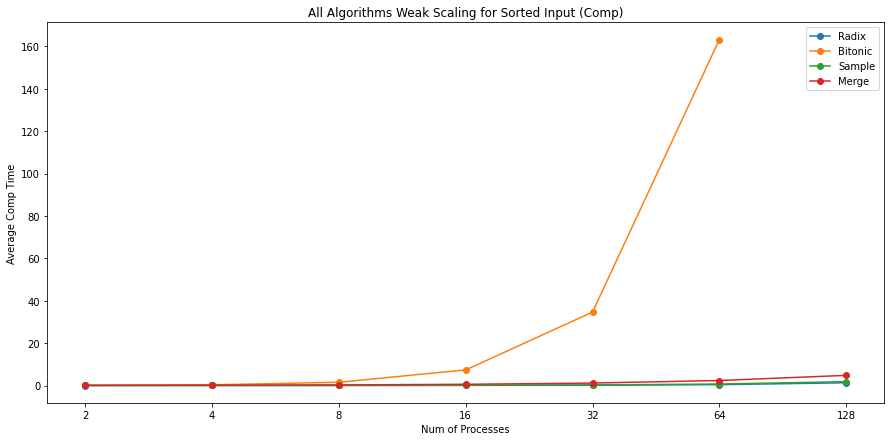

In [89]:
# multi algorithm weak scaling
input_types = ['Random', 'Sorted', '1_perturbed', 'Reverse_sorted']
plt_names = ['Random', 'Sorted', '1% Perturbed', 'Reverse Sorted']
times = {label : [] for label in input_types}

tk_names = ['tk16', 'tk18', 'tk20', 'tk22', 'tk24', 'tk26', 'tk28']
size_labels = ['2^16', '2^18', '2^20', '2^22', '2^24', '2^26', '2^28']

for i in range(7):
    df = tks[tk_names[i]]
    main_time = df.dataframe.loc[df.get_node("comp_large"), ["Avg time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs'] + 1
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    main_time.head()

    labels = main_time['input_type'].unique()
    for label in labels:
        subset = main_time[main_time['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        times[label].append(subset.loc[subset['num_procs'] == processes[i], 'Avg time/rank'].values[0])


input_sizes = [16, 18, 20, 22, 24, 26, 28]
labels = main_time2['input_type'].unique()
times2 = {label : [] for label in labels}
for i in range(7):
    sz = pow(2, input_sizes[i])
    subset = main_time2[main_time2['input_size'] == sz]
    labels = main_time2['input_type'].unique()
    
    for label in labels:
        time_subset = subset[subset['input_type'] == label]  # Filter data by array_type
        time_subset = time_subset.sort_values(by='num_procs')
        if not time_subset.loc[time_subset['num_procs'] == processes[i], 'Avg time/rank'].empty:  
            # print(time_subset.loc[time_subset['num_procs'] == processes[i], 'Max time/rank'])
            # print(time_subset.loc[time_subset['num_procs'] == processes[i], 'Max time/rank'].values[0])
            times2[label].append(time_subset.loc[time_subset['num_procs'] == processes[i], 'Avg time/rank'].values[0])
# print(times2)

labels = main_time3['input_type'].unique()
times3 = {label : [] for label in labels}
for i in range(7):
    sz = pow(2, input_sizes[i])
    subset = main_time3[main_time3['input_size'] == sz]
    
    for label in labels:
        time_subset = subset[subset['input_type'] == label]  # Filter data by array_type
        time_subset = time_subset.sort_values(by='num_procs')
        if not time_subset.loc[time_subset['num_procs'] == processes[i], 'Avg time/rank'].empty:  
            # print(time_subset.loc[time_subset['num_procs'] == processes[i], 'Max time/rank'])
            # print(time_subset.loc[time_subset['num_procs'] == processes[i], 'Max time/rank'].values[0])
            times3[label].append(time_subset.loc[time_subset['num_procs'] == processes[i], 'Avg time/rank'].values[0])
print(times3)

labels = main_time4['input_type'].unique()
times4 = {label : [] for label in labels}
for i in range(7):
    sz = pow(2, input_sizes[i])
    subset = main_time4[main_time4['input_size'] == sz]
    labels = main_time4['input_type'].unique()
    
    for label in labels:
        time_subset = subset[subset['input_type'] == label]  # Filter data by array_type
        time_subset = time_subset.sort_values(by='num_procs')
        if not time_subset.loc[time_subset['num_procs'] == processes[i], 'Avg time/rank'].empty:  
            times4[label].append(time_subset.loc[time_subset['num_procs'] == processes[i], 'Avg time/rank'].values[0])
print(times4)
    
        
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)
ax.plot(processes[0:7], times['Sorted'], marker='o', label = 'Radix')
ax.plot(processes[0:6], times2['Sorted'], marker='o', label = 'Bitonic')
ax.plot(processes[0:7], times3['Sorted'], marker='o', label = 'Sample')
ax.plot(processes[0:7], times4['Sorted'], marker='o', label = 'Merge')
ax.set_title(f'All Algorithms Weak Scaling for Sorted Input (Comp)')
ax.set_xlabel('Num of Processes')
ax.set_ylabel('Average Comp Time')
plt.xscale("log", base=2)
plt.xticks(processes[0:7])
ax.set_xticklabels(processes[0:7])
ax.legend()
plt.show()

{'Random': [0.003931, 0.009407, 0.021809, 0.05332, 0.141214, 0.40697, 1.288961], 'Sorted': [0.003714, 0.009392, 0.02189, 0.053199, 0.142907, 0.405128, 1.291462], '1_perturbed': [0.003711, 0.009193, 0.02156, 0.052961, 0.142932, 0.406483, 1.287963], 'Reverse_sorted': [0.003707, 0.009177, 0.021793, 0.053272, 0.143639, 0.406871, 1.329839]}


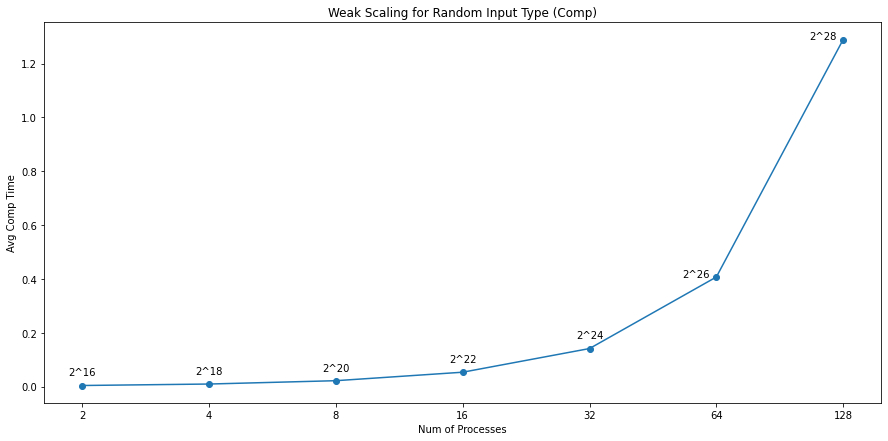

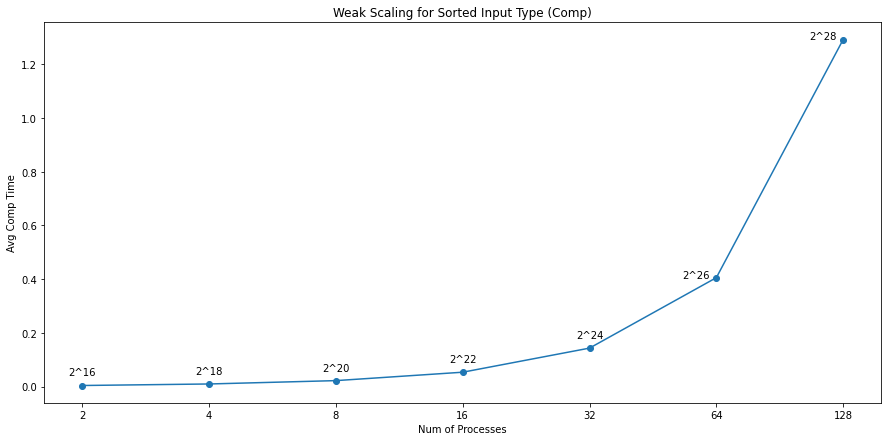

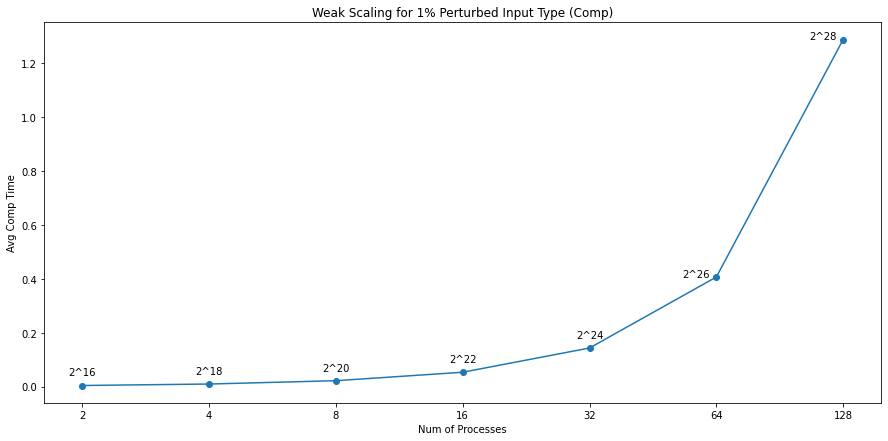

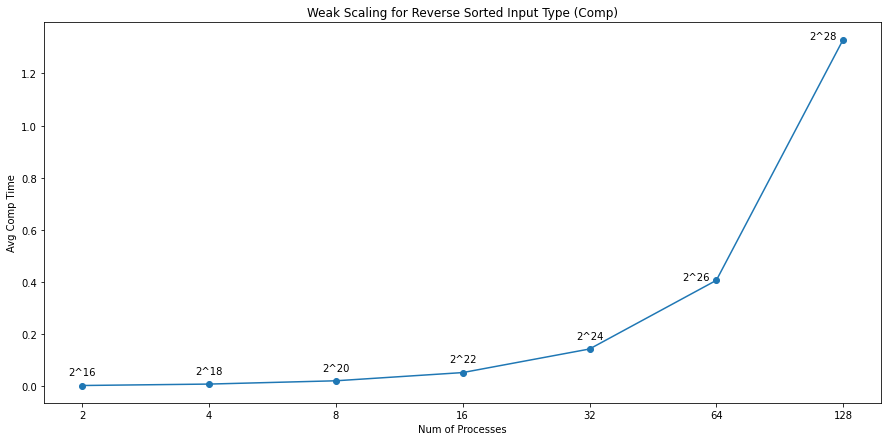

In [9]:
# weak scaling 

input_types = ['Random', 'Sorted', '1_perturbed', 'Reverse_sorted']
plt_names = ['Random', 'Sorted', '1% Perturbed', 'Reverse Sorted']
times = {label : [] for label in input_types}
tk_names = ['tk16', 'tk18', 'tk20', 'tk22', 'tk24', 'tk26', 'tk28']
size_labels = ['2^16', '2^18', '2^20', '2^22', '2^24', '2^26', '2^28']

for i in range(7):
    df = tks[tk_names[i]]
    main_time = df.dataframe.loc[df.get_node("comp_large"), ["Avg time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs'] + 1
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    main_time.head()

    labels = main_time['input_type'].unique()
    for label in labels:
        subset = main_time[main_time['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        times[label].append(subset.loc[subset['num_procs'] == processes[i], 'Avg time/rank'].values[0])
        
        
print(times)
curr = 0
for label in input_types:
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(processes[0:7], times[label], marker='o')
    for i, txt in enumerate(size_labels):
        if i < 5:
            x = 0
            y = 10
        else:
            x = -20
            y = 0
        ax.annotate(txt, (processes[i], times[label][i]), textcoords="offset points", 
                    xytext=(x,y), ha='center')
    ax.set_title(f'Weak Scaling for {plt_names[curr]} Input Type (Comp)')
    ax.set_xlabel('Num of Processes')
    ax.set_ylabel('Avg Comp Time')
    plt.xscale("log", base=2)
    plt.xticks(processes[0:7])
    ax.set_xticklabels(processes[0:7])
    plt.show()
    curr += 1


In [ ]:
input_types = ['Random', 'Sorted', '1_perturbed', 'Reverse_sorted']
plt_names = ['Random', 'Sorted', '1% Perturbed', 'Reverse Sorted']
tk_names = ['tk16', 'tk18', 'tk20', 'tk22', 'tk24', 'tk26', 'tk28']
size_labels = ['2^16', '2^18', '2^20', '2^22', '2^24', '2^26', '2^28']
times = {label : {sz : [] for sz in size_labels} for label in input_types}

for i in range(7):
    df = tks[tk_names[i]]
    main_time = df.dataframe.loc[df.get_node("comp_large"), ["Avg time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs'] + 1
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    main_time.head()

    labels = main_time['input_type'].unique()
    for label in labels:
        subset = main_time[main_time['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        subset_times = (2 * subset['Avg time/rank'].values[0]) / subset['Avg time/rank'].values
        
        times[label][size_labels[i]] = subset_times.tolist() 

# print(times)
curr = 0
for label in input_types:
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    for sz in size_labels:
        ax.plot(processes, times[label][sz], marker='o', label=sz)
    ax.set_title(f'Strong Scaling Speedup (Comp) for {plt_names[curr]} Input Type')
    ax.set_xlabel('Num of Processes')
    ax.set_ylabel('Avg Comp Time')
    ax.legend()
    plt.xscale("log", base=2)
    plt.xticks(processes)
    ax.set_xticklabels(processes)
    plt.show()
    curr += 1


['Sorted' 'Random' 'ReverseSorted' '1_perc_perturbed']
['Random' 'Reverse_sorted' 'Sorted' '1_perturbed']
['1_perc_perturbed' 'ReverseSorted' 'Sorted' 'Random']
{'1_perc_perturbed': {'2^16': [2.0, 3.846460523505541, 6.974740737553252, 11.572611737826646, 11.149893375524524, 17.725940507436572, 22.977884888006805, 27.979630588641463, 29.4755410074559, 30.155534883720936], '2^18': [2.0, 3.8450808776563608, 6.889248597822501, 11.22274101444407, 17.153176742395072, 22.353126149934766, 26.397582269979853, 28.649916391544824, 30.415676635258773, 31.224392523364486], '2^20': [2.0, 3.784716210000292, 6.8972033621447215, 11.58749297979884, 17.18716395304809, 22.735626810475086, 27.481564448749776, 29.61718648049067, 31.157510582313236, 31.976963719619587], '2^22': [2.0, 3.8450961176851144, 6.9943979888431995, 11.751475336589705, 17.730951762157908, 23.440331668880848, 28.124345418931885, 31.03341824357108, 32.77405661613353, 33.66862970883369], '2^24': [2.0, 3.7832445450915526, 7.01440166194239

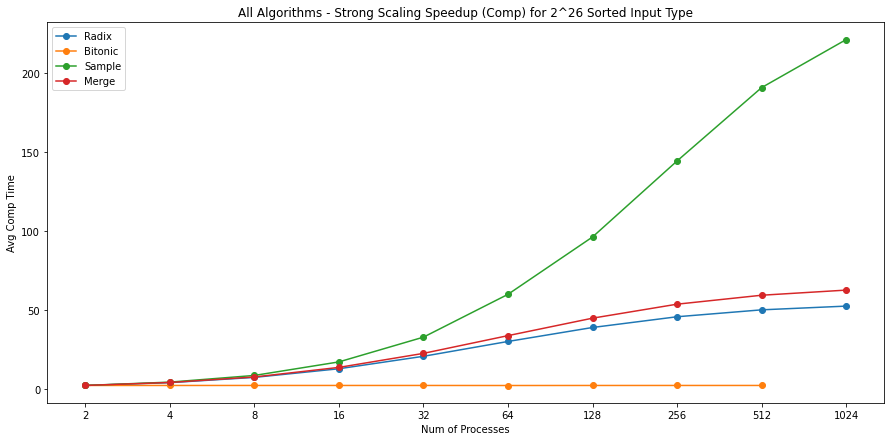

In [22]:
input_types = ['Random', 'Sorted', '1_perturbed', 'Reverse_sorted']
plt_names = ['Random', 'Sorted', '1% Perturbed', 'Reverse Sorted']
tk_names = ['tk16', 'tk18', 'tk20', 'tk22', 'tk24', 'tk26', 'tk28']
size_labels = ['2^16', '2^18', '2^20', '2^22', '2^24', '2^26', '2^28']
times = {label : {sz : [] for sz in size_labels} for label in input_types}

for i in range(7):
    df = tks[tk_names[i]]
    main_time = df.dataframe.loc[df.get_node("comp_large"), ["Avg time/rank"]]
    array_types = df.metadata["input_type"]
    num_procs = df.metadata['num_procs'] + 1
    main_time = pd.merge(main_time, array_types, on="profile").merge(num_procs, on="profile")
    main_time.head()

    labels = main_time['input_type'].unique()
    for label in labels:
        subset = main_time[main_time['input_type'] == label]  # Filter data by array_type
        subset = subset.sort_values(by='num_procs')
        subset_times = (2 * subset['Avg time/rank'].values[0]) / subset['Avg time/rank'].values
        
        times[label][size_labels[i]] = subset_times.tolist() 
# print(times)
input_sizes = [16, 18, 20, 22, 24, 26, 28]

labels = main_time2['input_type'].unique()
print(labels)
times2 = {label : {sz : [] for sz in size_labels} for label in labels}
for i in range(7):
    sz = pow(2, input_sizes[i])
    subset = main_time2[main_time2['input_size'] == sz]    
    for label in labels:
        time_subset = subset[subset['input_type'] == label]  # Filter data by array_type
        time_subset = time_subset.sort_values(by='num_procs')
        all_subset_times = (2 * time_subset['Avg time/rank'].values[0]) / time_subset['Avg time/rank'].values
        times2[label][size_labels[i]] = all_subset_times.tolist() 

labels = main_time3['input_type'].unique()
print(labels)
times3 = {label : {sz : [] for sz in size_labels} for label in labels}
for i in range(7):
    sz = pow(2, input_sizes[i])
    subset = main_time3[main_time3['input_size'] == sz]    
    for label in labels:
        time_subset = subset[subset['input_type'] == label]  # Filter data by array_type
        time_subset = time_subset.sort_values(by='num_procs')
        all_subset_times = (2 * time_subset['Avg time/rank'].values[0]) / time_subset['Avg time/rank'].values
        times3[label][size_labels[i]] = all_subset_times.tolist() 

labels = main_time4['input_type'].unique()
print(labels)
times4 = {label : {sz : [] for sz in size_labels} for label in labels}
for i in range(7):
    sz = pow(2, input_sizes[i])
    subset = main_time4[main_time4['input_size'] == sz]    
    for label in labels:
        time_subset = subset[subset['input_type'] == label]  # Filter data by array_type
        time_subset = time_subset.sort_values(by='num_procs')
        all_subset_times = (2 * time_subset['Max time/rank'].values[0]) / time_subset['Max time/rank'].values
        times4[label][size_labels[i]] = all_subset_times.tolist() 
        
# labels = main_time4['input_type'].unique()
# print(labels)
# times4 = {label : {sz : [] for sz in size_labels} for label in labels}
# for i in range(7):
#     sz = pow(2, input_sizes[i])
#     subset = main_time4[main_time4['input_size'] == sz]
#     labels = main_time4['input_type'].unique()
#     print(subset)
#     for label in labels:
#         time_subset = subset[subset['input_type'] == label]  # Filter data by array_type
#         time_subset = time_subset.sort_values(by='num_procs')
#         all_subset_times = (2 * time_subset['Avg time/rank'].values[0]) / time_subset['Avg time/rank'].values
#         times4[label][size_labels[i]] = all_subset_times.tolist() 

        
print(times4)
curr = 0
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 1, 1)

ax.plot(processes, times['Sorted'][size_labels[5]], marker='o', label='Radix')
ax.plot(processes[0:9], times2['Sorted'][size_labels[5]], marker='o', label='Bitonic')
ax.plot(processes, times3['Sorted'][size_labels[5]], marker='o', label='Sample')
ax.plot(processes, times4['Sorted'][size_labels[5]], marker='o', label='Merge')
ax.set_title(f'All Algorithms - Strong Scaling Speedup (Comp) for {size_labels[5]} Sorted Input Type')
ax.set_xlabel('Num of Processes')
ax.set_ylabel('Avg Comp Time')
ax.legend()
plt.xscale("log", base=2)
plt.xticks(processes)
ax.set_xticklabels(processes)
plt.show()
curr += 1


In [2]:
tkcm = th.Thicket.from_caliperreader(glob("cm-cali/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 11/11 [00:00<00:00, 17.21it/s]


(12,)
(12,)


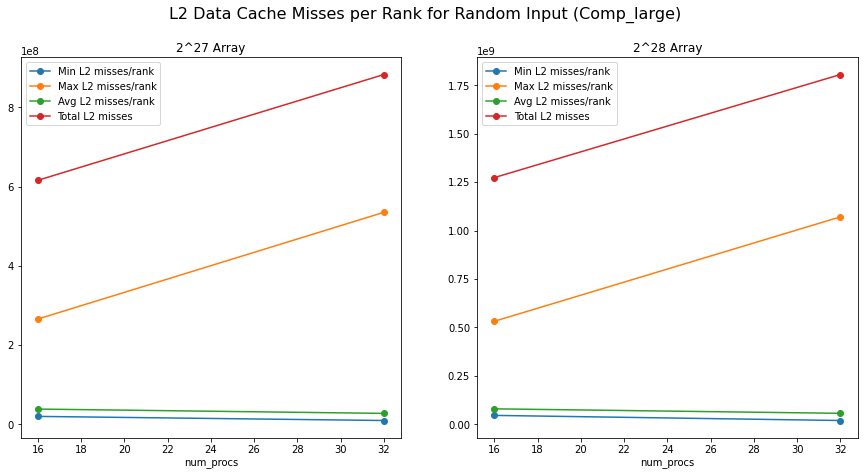

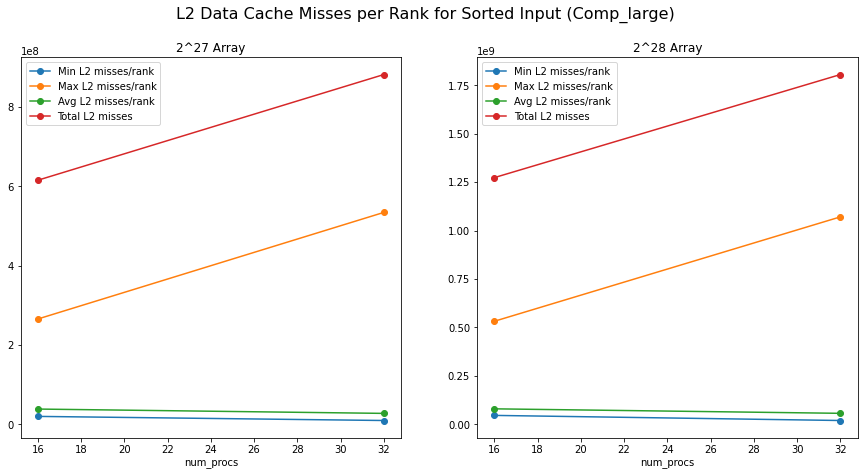

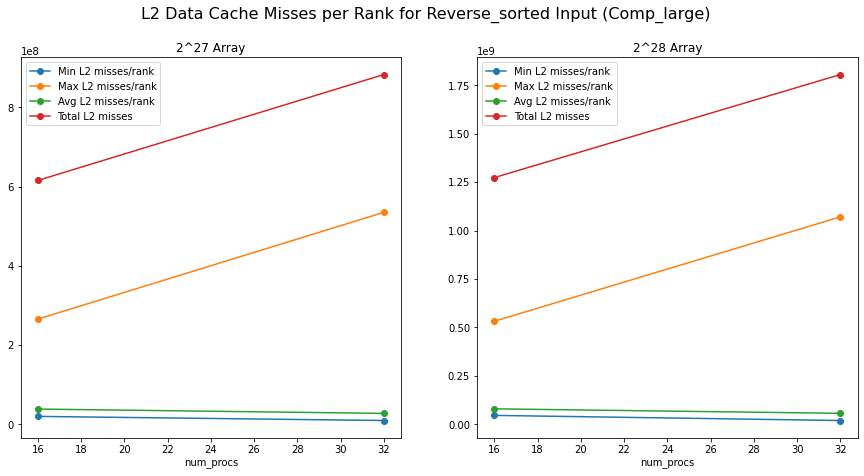

In [106]:
linesL1 = ["Min L1 misses/rank","Max L1 misses/rank", "Avg L1 misses/rank","Total L1 misses"]
linesL2 = ["Min L2 misses/rank","Max L2 misses/rank", "Avg L2 misses/rank","Total L2 misses"]
input_types = ['Random', 'Sorted', 'Reverse_sorted']


mpi_world_size = tkcm.metadata['mpi.world.size']
input_sizes = tkcm.metadata["input_size"]
array_types = tkcm.metadata["input_type"]

print(mpi_world_size.shape)
print(input_sizes.shape)
main_time = tkcm.dataframe.loc[tkcm.get_node("comp_large"), linesL2]
main_time = pd.merge(main_time, input_sizes, on="profile").merge(mpi_world_size, on="profile").merge(array_types, on ="profile")

for type in input_types:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
    subset = main_time[main_time['input_size'] == 134217728]
    subset = subset[subset['input_type'] == type]
    for line in linesL2:
        ax1.plot(subset['mpi.world.size'], subset[line], marker='o', label=line)

    ax1.set_title(f'2^27 Array')
    ax1.set_xlabel('num_procs')
    ax1.legend()
    
    
    subset = main_time[main_time['input_size'] == 268435456]
    subset = subset[subset['input_type'] == type]

    for line in linesL2:
        ax2.plot(subset['mpi.world.size'], subset[line], marker='o', label=line)

    ax2.set_title(f'2^28 Array')
    ax2.set_xlabel('num_procs')
    ax2.legend()
    fig.suptitle(f'L2 Data Cache Misses per Rank for {type} Input (Comp_large)', fontsize=16)

    plt.show()